# Final Project - Stocks Prediction - TSLA


### Importing Libraries

In [29]:
# Libraries
import pandas as pd
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame
from scipy.stats import linregress
import seaborn as seaborninstance

In [30]:
# Import Stock data
start = datetime.datetime(2015, 1, 1)
end = datetime.datetime(2020, 8, 22)
tsla = web.DataReader('TSLA', "yahoo", start, end)
tsla.tail()

High          Low         Open        Close    Volume  \
Date                                                                       
2020-08-14  1668.800049  1626.640015  1664.989990  1650.709961  12577600   
2020-08-17  1845.859985  1672.829956  1677.000000  1835.640015  20242300   
2020-08-18  1923.900024  1845.109985  1898.989990  1887.089966  16474500   
2020-08-19  1911.000000  1841.209961  1865.000000  1878.530029  12158700   
2020-08-20  2003.000000  1857.069946  1860.680054  1996.984985  13343407   

              Adj Close  
Date                     
2020-08-14  1650.709961  
2020-08-17  1835.640015  
2020-08-18  1887.089966  
2020-08-19  1878.530029  
2020-08-20  1996.984985

### Cleaning Data

In [31]:
# Cleaning Data: reset index and rename columns
tsla.reset_index(inplace = True)
tsla = tsla.rename(columns={'Adj Close': 'Adj_Close'})
tsla

Date         High          Low         Open        Close    Volume  \
0    2015-01-02   223.250000   213.259995   222.869995   219.309998   4764400   
1    2015-01-05   216.500000   207.160004   214.550003   210.089996   5368500   
2    2015-01-06   214.199997   204.210007   210.059998   211.279999   6261900   
3    2015-01-07   214.779999   209.779999   213.350006   210.949997   2968400   
4    2015-01-08   213.800003   210.009995   212.809998   210.619995   3442500   
...         ...          ...          ...          ...          ...       ...   
1414 2020-08-14  1668.800049  1626.640015  1664.989990  1650.709961  12577600   
1415 2020-08-17  1845.859985  1672.829956  1677.000000  1835.640015  20242300   
1416 2020-08-18  1923.900024  1845.109985  1898.989990  1887.089966  16474500   
1417 2020-08-19  1911.000000  1841.209961  1865.000000  1878.530029  12158700   
1418 2020-08-20  2003.000000  1857.069946  1860.680054  1996.984985  13343407   

        Adj_Close  
0      219.309998  
1      210.089996  
2      211.279999  
3      210.949997  
4      210.619995  
...           ...  
1414  1650.709961  
1415  1835.640015  
1416  1887.089966  
1417  1878.530029  
1418  1996.984985  

[1419 rows x 7 columns]

In [32]:
# Export file as a CSV, without the Pandas index, but with the header
tsla.to_csv("tsla.csv", index=False, header=True)

### Analysing Data

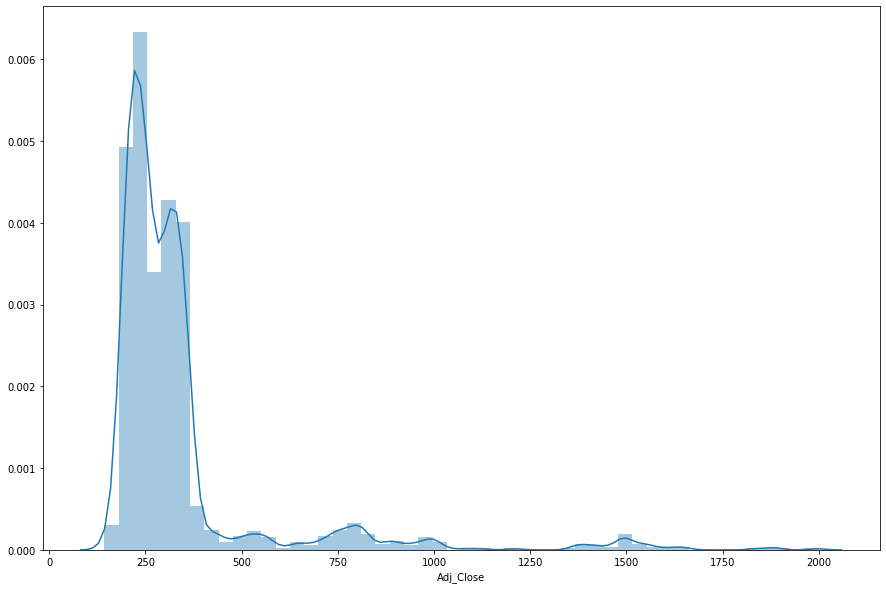

In [33]:
# Determine Average Adj close Price of the stock
plt.figure(figsize=(15,10))
plt.tight_layout()
seaborninstance.distplot(tsla['Adj_Close'])

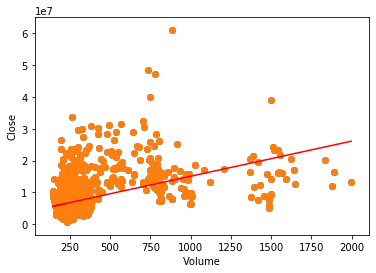

The r-squared is: 0.20978379878910752


In [34]:
# Analyze Correlation between Volume and Closing Price
x_values = tsla['Close']
y_values = tsla['Volume']
plt.scatter(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Volume')
plt.ylabel('Close')
plt.show()
print(f"The r-squared is: {rvalue**2}")

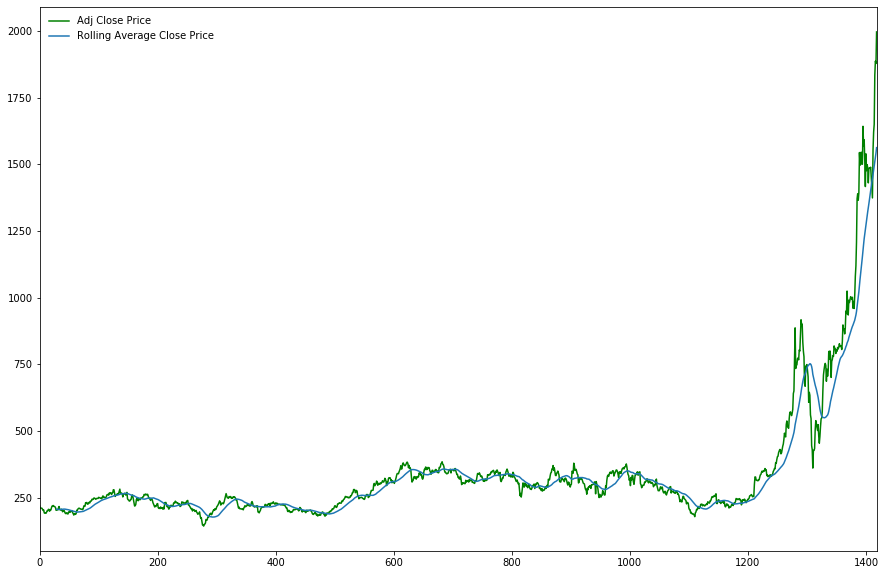

In [35]:
# Analyze the Adj Close Price over time and rolling average close price
%matplotlib inline
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(tsla['Adj_Close'],label = 'Adj Close Price',color='green')
#plt.plot(df_total['High'],label = 'High Price',color='blue')
#plt.plot(df_total['Close'],label = 'Close Price',color ='orange')
tsla['Adj_Close'].rolling(window=30).mean().plot(label = 'Rolling Average Close Price')
plt.legend(loc='upper left', frameon=False)

In [36]:
# Candlestick Graph
import plotly.graph_objects as go
import pandas as pd


fig = go.Figure(data=[go.Candlestick(x=tsla['Date'],
                open=tsla['Open'], high=tsla['High'],
                low=tsla['Low'], close=tsla['Close'])
                      ])

fig.update_layout(
    title='TSLA Stocks',
    yaxis_title='Price')
    
fig.show()

### Formating Data to Feed ML

In [37]:
# Shift Adj_Close Price by 1 day, to obtein Price_Change
tsla['Prev_Close'] = tsla[['Adj_Close']].shift(1)
tsla['Price_Change'] = tsla['Adj_Close'] - tsla['Prev_Close']
tsla

Date         High          Low         Open        Close    Volume  \
0    2015-01-02   223.250000   213.259995   222.869995   219.309998   4764400   
1    2015-01-05   216.500000   207.160004   214.550003   210.089996   5368500   
2    2015-01-06   214.199997   204.210007   210.059998   211.279999   6261900   
3    2015-01-07   214.779999   209.779999   213.350006   210.949997   2968400   
4    2015-01-08   213.800003   210.009995   212.809998   210.619995   3442500   
...         ...          ...          ...          ...          ...       ...   
1414 2020-08-14  1668.800049  1626.640015  1664.989990  1650.709961  12577600   
1415 2020-08-17  1845.859985  1672.829956  1677.000000  1835.640015  20242300   
1416 2020-08-18  1923.900024  1845.109985  1898.989990  1887.089966  16474500   
1417 2020-08-19  1911.000000  1841.209961  1865.000000  1878.530029  12158700   
1418 2020-08-20  2003.000000  1857.069946  1860.680054  1996.984985  13343407   

        Adj_Close   Prev_Close  Price_Change  
0      219.309998          NaN           NaN  
1      210.089996   219.309998     -9.220001  
2      211.279999   210.089996      1.190002  
3      210.949997   211.279999     -0.330002  
4      210.619995   210.949997     -0.330002  
...           ...          ...           ...  
1414  1650.709961  1621.000000     29.709961  
1415  1835.640015  1650.709961    184.930054  
1416  1887.089966  1835.640015     51.449951  
1417  1878.530029  1887.089966     -8.559937  
1418  1996.984985  1878.530029    118.454956  

[1419 rows x 9 columns]

In [38]:
tsla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1419 entries, 0 to 1418
Data columns (total 9 columns):
Date            1419 non-null datetime64[ns]
High            1419 non-null float64
Low             1419 non-null float64
Open            1419 non-null float64
Close           1419 non-null float64
Volume          1419 non-null int64
Adj_Close       1419 non-null float64
Prev_Close      1418 non-null float64
Price_Change    1418 non-null float64
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 99.9 KB


In [39]:
tsla = tsla.dropna()

In [40]:
# Rolling average Price_Change by 30 days
tsla['PC_Rolling_Avg'] = tsla.iloc[:,8].rolling(window=30).mean()
tsla

/Users/kpp/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Date         High          Low         Open        Close    Volume  \
1    2015-01-05   216.500000   207.160004   214.550003   210.089996   5368500   
2    2015-01-06   214.199997   204.210007   210.059998   211.279999   6261900   
3    2015-01-07   214.779999   209.779999   213.350006   210.949997   2968400   
4    2015-01-08   213.800003   210.009995   212.809998   210.619995   3442500   
5    2015-01-09   209.979996   204.960007   208.919998   206.660004   4668300   
...         ...          ...          ...          ...          ...       ...   
1414 2020-08-14  1668.800049  1626.640015  1664.989990  1650.709961  12577600   
1415 2020-08-17  1845.859985  1672.829956  1677.000000  1835.640015  20242300   
1416 2020-08-18  1923.900024  1845.109985  1898.989990  1887.089966  16474500   
1417 2020-08-19  1911.000000  1841.209961  1865.000000  1878.530029  12158700   
1418 2020-08-20  2003.000000  1857.069946  1860.680054  1996.984985  13343407   

        Adj_Close   Prev_Close  Price_Change  PC_Rolling_Avg  
1      210.089996   219.309998     -9.220001             NaN  
2      211.279999   210.089996      1.190002             NaN  
3      210.949997   211.279999     -0.330002             NaN  
4      210.619995   210.949997     -0.330002             NaN  
5      206.660004   210.619995     -3.959991             NaN  
...           ...          ...           ...             ...  
1414  1650.709961  1621.000000     29.709961       14.734998  
1415  1835.640015  1650.709961    184.930054       15.468669  
1416  1887.089966  1835.640015     51.449951       16.574333  
1417  1878.530029  1887.089966     -8.559937       17.088334  
1418  1996.984985  1878.530029    118.454956       20.090165  

[1418 rows x 10 columns]

In [41]:
tsla = tsla.dropna()

In [42]:
# Price_Change Static_Average
tsla['PC_Static_Avg'] = tsla.iloc[:,9].mean()
tsla

/Users/kpp/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Date         High          Low         Open        Close    Volume  \
30   2015-02-17   205.699997   201.500000   205.699997   204.350006   3979600   
31   2015-02-18   206.169998   202.600006   204.169998   204.460007   2713600   
32   2015-02-19   212.440002   203.750000   205.000000   211.710007   5154100   
33   2015-02-20   217.600006   209.809998   210.779999   217.110001   5982100   
34   2015-02-23   218.199997   206.330002   215.660004   207.339996   8499800   
...         ...          ...          ...          ...          ...       ...   
1414 2020-08-14  1668.800049  1626.640015  1664.989990  1650.709961  12577600   
1415 2020-08-17  1845.859985  1672.829956  1677.000000  1835.640015  20242300   
1416 2020-08-18  1923.900024  1845.109985  1898.989990  1887.089966  16474500   
1417 2020-08-19  1911.000000  1841.209961  1865.000000  1878.530029  12158700   
1418 2020-08-20  2003.000000  1857.069946  1860.680054  1996.984985  13343407   

        Adj_Close   Prev_Close  Price_Change  PC_Rolling_Avg  PC_Static_Avg  
30     204.350006   203.770004      0.580002       -0.498666       0.976378  
31     204.460007   204.350006      0.110001       -0.187666       0.976378  
32     211.710007   204.460007      7.250000        0.014334       0.976378  
33     217.110001   211.710007      5.399994        0.205333       0.976378  
34     207.339996   217.110001     -9.770004       -0.109333       0.976378  
...           ...          ...           ...             ...            ...  
1414  1650.709961  1621.000000     29.709961       14.734998       0.976378  
1415  1835.640015  1650.709961    184.930054       15.468669       0.976378  
1416  1887.089966  1835.640015     51.449951       16.574333       0.976378  
1417  1878.530029  1887.089966     -8.559937       17.088334       0.976378  
1418  1996.984985  1878.530029    118.454956       20.090165       0.976378  

[1389 rows x 11 columns]

In [43]:
tsla.dtypes

Date              datetime64[ns]
High                     float64
Low                      float64
Open                     float64
Close                    float64
Volume                     int64
Adj_Close                float64
Prev_Close               float64
Price_Change             float64
PC_Rolling_Avg           float64
PC_Static_Avg            float64
dtype: object

### Linear Regression

In [44]:
# Create the independent data set (X)
# Convert the dataframe to a numpy array
X = tsla[["Prev_Close", "PC_Rolling_Avg","PC_Static_Avg"]]
y = tsla['Adj_Close']
#Remove the forecasted number of rows
X = X[30:]
y = y[30:]
print(y)
print(X)
print("Shape:", X.shape, y.shape)

60       188.770004
61       187.589996
62       191.000000
63       203.100006
64       203.250000
           ...     
1414    1650.709961
1415    1835.640015
1416    1887.089966
1417    1878.530029
1418    1996.984985
Name: Adj_Close, Length: 1359, dtype: float64
       Prev_Close  PC_Rolling_Avg  PC_Static_Avg
60     190.570007       -0.519333       0.976378
61     188.770004       -0.562334       0.976378
62     187.589996       -0.690334       0.976378
63     191.000000       -0.467000       0.976378
64     203.100006       -0.136333       0.976378
...           ...             ...            ...
1414  1621.000000       14.734998       0.976378
1415  1650.709961       15.468669       0.976378
1416  1835.640015       16.574333       0.976378
1417  1887.089966       17.088334       0.976378
1418  1878.530029       20.090165       0.976378

[1359 rows x 3 columns]
Shape: (1359, 3) (1359,)


In [45]:
# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
# Create and train the Linear Regression  Model
model = LinearRegression()
# Train the model
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
model_confidence = model.score(X_test, y_test)
print("Model Confidence: ", model_confidence)

Model Confidence:  0.9960206848747076


In [48]:
print(f'Coefficient: {model.coef_}')
print(f'Y-intercept: {model.intercept_}') 

Coefficient: [1.00332722 1.20310663 0.        ]
Y-intercept: -0.5600434044256986


In [49]:
# Prediction = Adj_Close, PC_Rolling_Avg, PC_Static_Avg

model_prediction = model.predict([[1878.530029, 17.088334, 0.976234]])
print(model_prediction)

[1904.77935149]


In [50]:
svr_rbf = SVR(kernel='linear', C=1e3, gamma=0.1) 
svr_rbf.fit(X_train, y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [51]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
svm_value = svr_rbf.score(X_test, y_test)
print("svm_model: ", svm_value)

svm_model:  0.9209681156346554


In [53]:
svm_prediction = svr_rbf.predict([[1878.530029, 17.088334, 0.976234]])
print(svm_prediction)

[2270.92292984]
